### 이상치 데이터 처리
- 피쳐/특성에 데이터 값의 범위를 벗어나는 데이터를 의미
- 종류 : 잘못입력된 경우, 자연으로 생성된 데이터
    * 잘못입력된 데이터 : 입력 시 오타
    * 자연으로 생성된 데이터 : 연봉, 키, 몸무게, 나이 ==> 분리해서 전용 모델/식별용 피쳐
- 이상치의 탐지
    * 시각화 확인
    * 데이터의 분포를 확인해서 : Z-Score, IQR(Turkey Fences), Boxplot, 
- 처리
    * 삭제/대체/분리 모델/파생변수 추가


### (1) 모듈 및 데이터 준비 <hr>

In [1]:
from sklearnex import patch_sklearn, unpatch_sklearn
patch_sklearn()

import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [11]:
df = pd.DataFrame(
    {
        'num': list(np.random.choice(range(1, 4), 10, replace=True)) + [15,-14]
    }
)
df

,num
0,1
1,1
2,2
3,3
4,1
5,2
6,1
7,3
8,2
9,2


### (2) 데이터 전처리


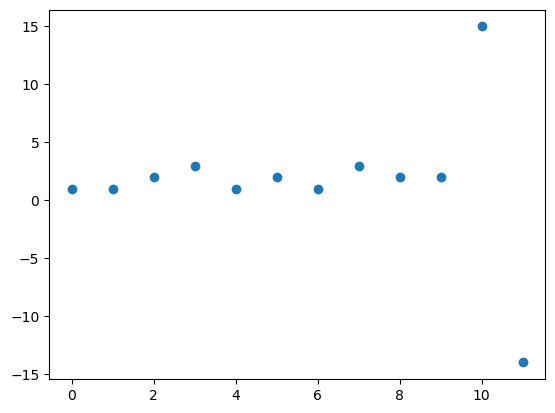

In [17]:
plt.scatter(range(df['num'].shape[0]),df['num'] )


(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 4., 6., 0., 0., 0., 0., 0.,
        0., 0., 1.]),
 array([-14.  , -12.55, -11.1 ,  -9.65,  -8.2 ,  -6.75,  -5.3 ,  -3.85,
         -2.4 ,  -0.95,   0.5 ,   1.95,   3.4 ,   4.85,   6.3 ,   7.75,
          9.2 ,  10.65,  12.1 ,  13.55,  15.  ]),
 <BarContainer object of 20 artists>)

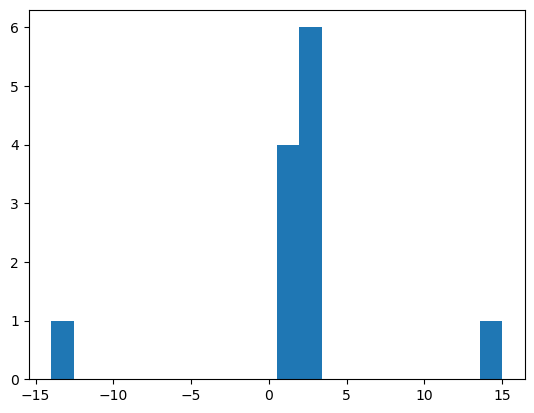

In [21]:
plt.hist(df['num'],bins=20)

#### (2-2) 불필요한 데이터 체크 => 결측치, 이상치

In [24]:
# 결측치 체크
df.isnull().sum()

num    0
dtype: int64

In [38]:
# 이상치 탐지 - 방법 (1) 평균과 편차를 이용한 탐지 Z-Score

mean_value = df.mean()
std_value = df.std()
z_score = (df - mean_value)/std_value
z_score

,num
0,-0.093417
1,-0.093417
2,0.066727
3,0.226870
4,-0.093417
5,0.066727
6,-0.093417
7,0.226870
8,0.066727
9,0.066727


In [41]:
# 양 끝단의 데이터 제거를 위한 기준값 1
threshold = 1
mask = np.abs(z_score) > threshold

df[~mask].dropna()

,num
0,1.0
1,1.0
2,2.0
3,3.0
4,1.0
5,2.0
6,1.0
7,3.0
8,2.0
9,2.0


In [48]:
# 이상치 탐지 - 방법(2) 데이터를 4등분해서 가운데 데이터를 기준으로 이상치 탐지 
q1, q3 = df.quantile(0.25), df.quantile(0.75)
iqr = q3 - q1

# 이상치로 판단할 기준되는 값
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr


print(
    f'q1 : {q1},\n q3 : {q3},\n IQR : {q3-q1}'
)
print(
    f'Lower Bound : {lower_bound},\n Upper Bound : {upper_bound}'
)



q1 : num    1.0
Name: 0.25, dtype: float64,
 q3 : num    2.25
Name: 0.75, dtype: float64,
 IQR : num    1.25
dtype: float64
Lower Bound : num   -0.875
dtype: float64,
 Upper Bound : num    4.125
dtype: float64


{'whiskers': [<matplotlib.lines.Line2D at 0x1b16173b910>,
 'caps': [<matplotlib.lines.Line2D at 0x1b16173bd60>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b16173b670>],
 'medians': [<matplotlib.lines.Line2D at 0x1b16174a2e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b16174a580>],
 'means': []}

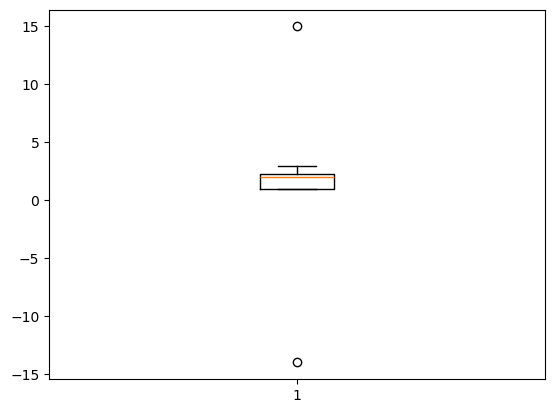

In [47]:
plt.boxplot(df['num'])